In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

In [12]:
# Load data
data = pd.read_csv('/kaggle/input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv', encoding='ISO-8859-1')
#data = pd.read_csv('/kaggle/input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv', encoding='cp1252')


# Check columns
print(data.columns)
data.head()

Index(['Unnamed: 0', '0', 'a'], dtype='object')


,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [14]:
# Preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

data['a'] = data['a'].apply(preprocess_text)

In [17]:
# Encode labels
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['0'])
num_classes = len(label_encoder.classes_)


In [18]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    data['a'], data['Label_encoded'], test_size=0.2, random_state=42, stratify=data['Label_encoded']
)

In [19]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 300
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

vocab_size = len(tokenizer.word_index) + 1

In [23]:
# Build RNN model
rnn_model = Sequential([
    Embedding(vocab_size, 64, input_length=max_len),
    SimpleRNN(64),
    Dense(num_classes, activation='softmax')
])

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
# Train RNN model
print("Training RNN model...")
rnn_history = rnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))


Training RNN model...
Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 19s 158ms/step - accuracy: 0.6876 - loss: 0.7496 - val_accuracy: 0.9855 - val_loss: 0.0890
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.9875 - loss: 0.0551 - val_accuracy: 0.9736 - val_loss: 0.1325
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 0.9716 - loss: 0.1079 - val_accuracy: 0.9875 - val_loss: 0.0446
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.9856 - loss: 0.0441 - val_accuracy: 0.9808 - val_loss: 0.0578
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.9836 - loss: 0.0464 - val_accuracy: 0.9841 - val_loss: 0.0430


In [25]:
# Build LSTM model
lstm_model = Sequential([
    Embedding(vocab_size, 64, input_length=max_len),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:
# Train LSTM model
print("\nTraining LSTM model...")
lstm_history = lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))



Training LSTM model...
Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 27s 250ms/step - accuracy: 0.4899 - loss: 0.9704 - val_accuracy: 0.8507 - val_loss: 0.5856
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 241ms/step - accuracy: 0.8977 - loss: 0.3392 - val_accuracy: 0.9643 - val_loss: 0.1404
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 246ms/step - accuracy: 0.9661 - loss: 0.1136 - val_accuracy: 0.9723 - val_loss: 0.0933
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 245ms/step - accuracy: 0.9740 - loss: 0.0769 - val_accuracy: 0.9802 - val_loss: 0.0696
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 244ms/step - accuracy: 0.9771 - loss: 0.0625 - val_accuracy: 0.9742 - val_loss: 0.0684


In [35]:
# Build LSTM model
bilstm_model = Sequential([
    Embedding(vocab_size, 64, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(num_classes, activation='softmax')
])

bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
# Train LSTM model
print("\nTraining LSTM model...")
bilstm_history = bilstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))



Training LSTM model...
Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 35s 310ms/step - accuracy: 0.5293 - loss: 0.8975 - val_accuracy: 0.9439 - val_loss: 0.2207
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.9622 - loss: 0.1267 - val_accuracy: 0.9841 - val_loss: 0.0468
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.9879 - loss: 0.0440 - val_accuracy: 0.9881 - val_loss: 0.0272
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.9859 - loss: 0.0300 - val_accuracy: 0.9927 - val_loss: 0.0170
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.9937 - loss: 0.0160 - val_accuracy: 0.9941 - val_loss: 0.0110


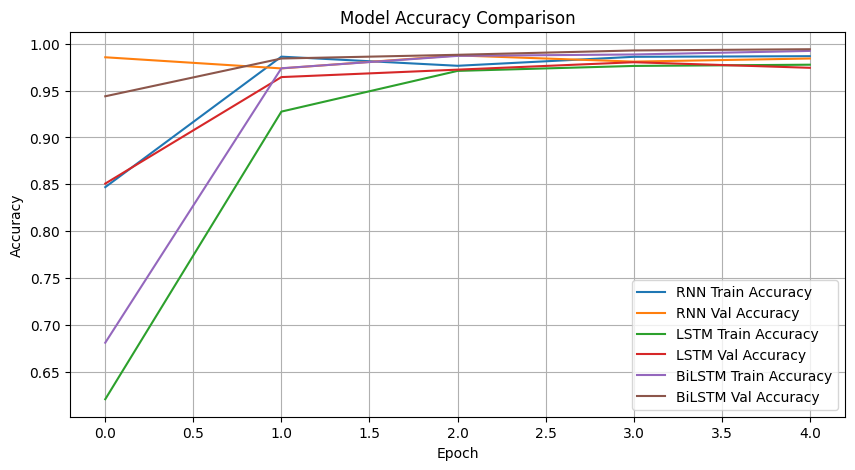

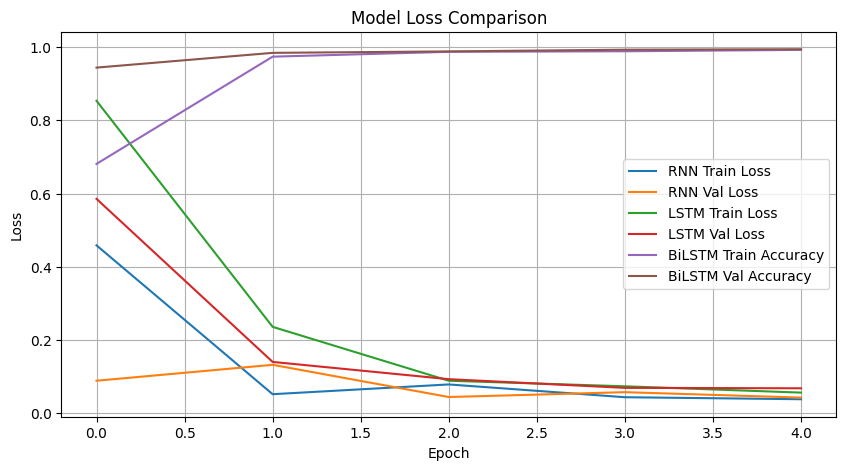

In [37]:
# Plotting Accuracy
plt.figure(figsize=(10,5))
plt.plot(rnn_history.history['accuracy'], label='RNN Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Val Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val Accuracy')
plt.plot(bilstm_history.history['accuracy'], label='BiLSTM Train Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='BiLSTM Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plotting Loss
plt.figure(figsize=(10,5))
plt.plot(rnn_history.history['loss'], label='RNN Train Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Val Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.plot(bilstm_history.history['accuracy'], label='BiLSTM Train Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='BiLSTM Val Accuracy')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()